In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

DF_SOURCE = pd.read_csv(r"D:\PYTHON\BANK DATASET -BINARY CLASSIFICATION\DATASET\train.csv")
DF_TEST = pd.read_csv(r"D:\PYTHON\BANK DATASET -BINARY CLASSIFICATION\DATASET\test.csv")
DF_SOURCE.head()
DF_EVAL = DF_SOURCE.copy()
# list to store column names
str = []
num = []

for i in DF_EVAL.columns:
    if pd.api.types.is_numeric_dtype(DF_EVAL[i]):
        num.append(i)
    else:
        str.append(i)

print(str)
print(num)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


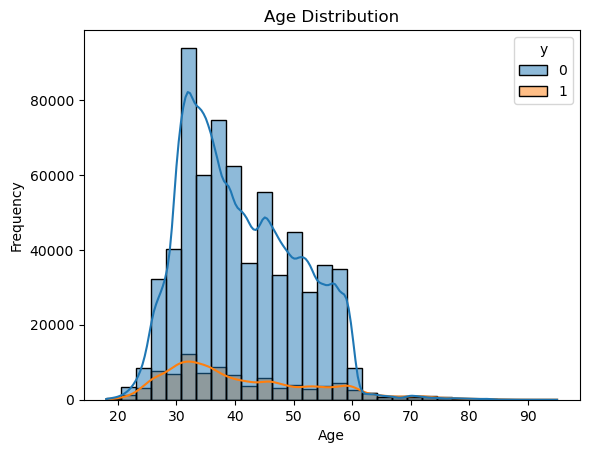

count    750000.000000
mean         40.926395
std          10.098829
min          18.000000
25%          33.000000
50%          39.000000
75%          48.000000
max          95.000000
Name: age, dtype: float64

In [3]:
sns.histplot(DF_SOURCE, x = 'age',  hue='y', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
DF_SOURCE['age'].describe()

In [4]:
#CONVERT TGE AGE TO CATEGORY
def age(x):
    y = " "
    if x < 10:
        y = "0-10"
    elif x>= 10 and x < 20:
        y = "10-20"
    elif x>= 20 and x < 30:
        y = "20-30"
    elif x>= 30 and x < 40:
        y = "30-40"
    elif x>= 40 and x < 50:
        y = "40-50"
    elif x>= 50 and x < 60:
        y = "50-60"
    elif x>= 60 and x < 70:
        y = "60-70"
    elif x>= 70 and x < 80:
        y = "70-80"
    elif x>= 80 and x < 90:
        y = "80-90"
    elif x>= 90 and x < 100:
        y = "90-100"
    else:
        y = ">100"
    return y
DF_EVAL['age_cat'] = DF_EVAL['age'].apply(age)
DF_TEST['age_cat'] = DF_TEST['age'].apply(age)
DF_EVAL.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0,40-50
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0,30-40
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0,30-40
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0,20-30
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1,20-30


In [5]:
#REPLACING UNKNOW IN JOB COLUMN
DF_EVAL['job'] = DF_EVAL['job'].replace('unknown', np.nan)
DF_TEST['job'] = DF_TEST['job'].replace('unknown', np.nan)
DF_EVAL['job'].value_counts()
gp = DF_EVAL.groupby('job')
for i, j in gp:
    print(f"the minimun of {i} : {j['balance'].min()} and the maximum is {j['balance'].max()} and the mean is {j['balance'].mean()} ")

the minimun of admin. : -8019 and the maximum is 98418 and the mean is 1019.9245815540175 
the minimun of blue-collar : -8019 and the maximum is 98417 and the mean is 977.4941817499325 
the minimun of entrepreneur : -8019 and the maximum is 98417 and the mean is 1306.7492380629867 
the minimun of housemaid : -1941 and the maximum is 98417 and the mean is 1281.2202111613876 
the minimun of management : -8019 and the maximum is 99218 and the mean is 1510.3852832101902 
the minimun of retired : -4057 and the maximum is 81204 and the mean is 1812.0711951115532 
the minimun of self-employed : -8019 and the maximum is 98417 and the mean is 1598.2691377497372 
the minimun of services : -8019 and the maximum is 98417 and the mean is 834.6257066766341 
the minimun of student : -1168 and the maximum is 66721 and the mean is 1577.3187728392963 
the minimun of technician : -8019 and the maximum is 98942 and the mean is 1071.5715351140782 
the minimun of unemployed : -3028 and the maximum is 99717 

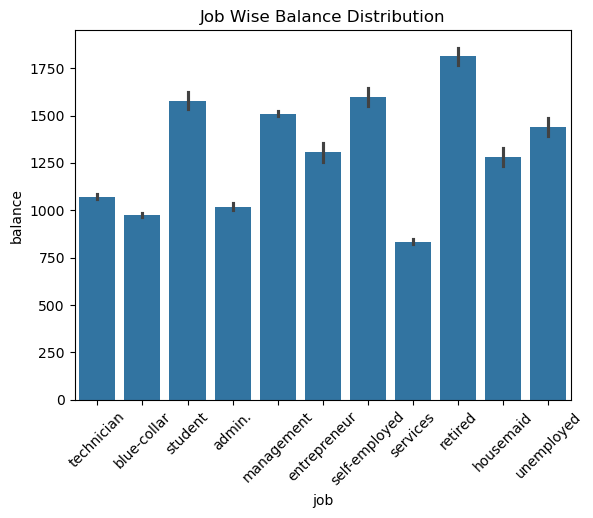

In [6]:
sns.barplot(data=DF_EVAL ,  x= 'job' ,  y = 'balance')
plt.title('Job Wise Balance Distribution')
plt.xticks(rotation = 45)
plt.show()

In [7]:
GP_AGE = DF_EVAL.groupby('age_cat')
for i, j in GP_AGE:
    print(f"{i}  : {j['job'].isna().sum()} - na count")
    print(f"{i}  : {j['balance'].mean()} - the average bank balance")

10-20  : 2 - na count
10-20  : 1174.724852071006 - the average bank balance
20-30  : 103 - na count
20-30  : 1052.445705724351 - the average bank balance
30-40  : 469 - na count
30-40  : 1126.07549035979 - the average bank balance
40-50  : 982 - na count
40-50  : 1134.0117072777557 - the average bank balance
50-60  : 1112 - na count
50-60  : 1369.0854933036815 - the average bank balance
60-70  : 191 - na count
60-70  : 2059.257070565083 - the average bank balance
70-80  : 54 - na count
70-80  : 3022.57535959975 - the average bank balance
80-90  : 4 - na count
80-90  : 3327.5407949790797 - the average bank balance
90-100  : 0 - na count
90-100  : 2039.6451612903227 - the average bank balance


In [8]:
DF_EVAL['job'] = DF_EVAL['job'].fillna(DF_EVAL.groupby('age')['job'].transform(lambda x:x.mode()[0] if not x.mode().empty else None))
DF_TEST['job'] = DF_TEST['job'].fillna(DF_TEST.groupby('age')['job'].transform(lambda x:x.mode()[0] if not x.mode().empty else None))
DF_EVAL.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0,40-50
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0,30-40
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0,30-40
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0,20-30
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1,20-30


In [9]:
#THERE IS NO PROBLEM WITH MARITAL SO WE WILL MOVE ON TO EDUCATION
DF_EVAL['education'] = DF_EVAL['education'].replace({"unknown" : np.nan})
DF_TEST['education'] = DF_TEST['education'].replace({"unknown" : np.nan})
DF_EVAL['education'].value_counts()

gp_ed = DF_EVAL.groupby('job')
for i, j in gp_ed:
    print(f"{i} - {j['education'].value_counts()}")

DF_EVAL['education'] = DF_EVAL['education'].fillna(DF_EVAL.groupby('job')['education'].transform(lambda x:x.mode()[0] if not x.mode().empty else None ))
DF_TEST['education'] = DF_TEST['education'].fillna(DF_TEST.groupby('job')['education'].transform(lambda x:x.mode()[0] if not x.mode().empty else None ))

admin. - education
secondary    70914
tertiary      6536
primary       2100
Name: count, dtype: int64
blue-collar - education
secondary    101842
primary       61693
tertiary       1659
Name: count, dtype: int64
entrepreneur - education
tertiary     8396
secondary    6648
primary      1895
Name: count, dtype: int64
housemaid - education
primary      8839
secondary    4741
tertiary     1860
Name: count, dtype: int64
management - education
tertiary     155121
secondary     14762
primary        3419
Name: count, dtype: int64
retired - education
secondary    17510
primary      11527
tertiary      5133
Name: count, dtype: int64
self-employed - education
tertiary     10495
secondary     6906
primary       1266
Name: count, dtype: int64
services - education
secondary    56797
primary       3779
tertiary      2015
Name: count, dtype: int64
student - education
secondary    6975
tertiary     2788
primary       351
Name: count, dtype: int64
technician - education
secondary    104096
tertiary     

C:\Users\VINOTH\AppData\Local\Temp\ipykernel_24448\4200487159.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF_EVAL[i] = DF_EVAL[i].replace({"yes":1, "no":0 })
C:\Users\VINOTH\AppData\Local\Temp\ipykernel_24448\4200487159.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF_TEST[i] = DF_TEST[i].replace({"yes":1, "no":0 })


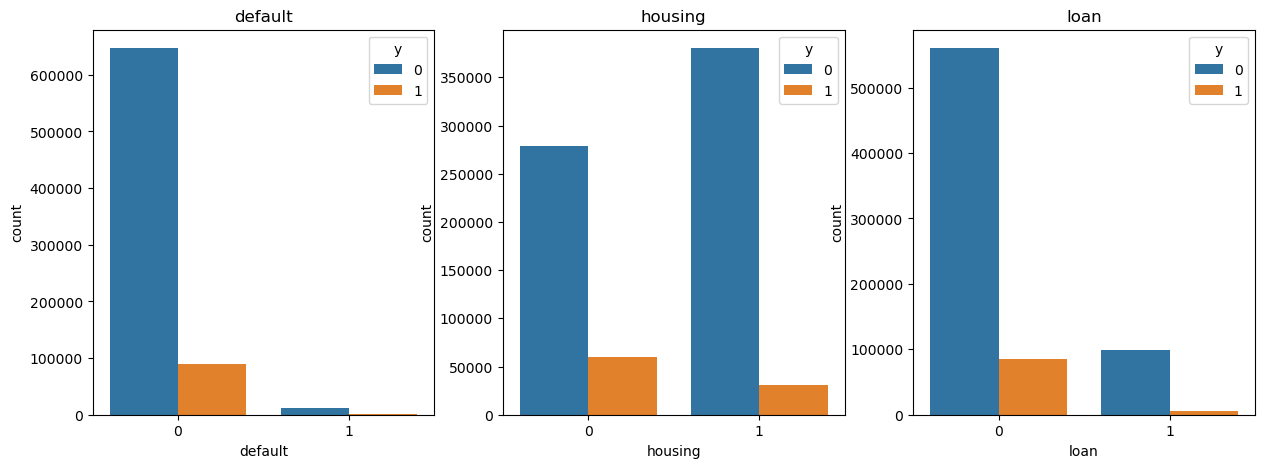

In [10]:
#convert yes and no to 0 and 1 in the dataframe
yn = ['default', 'housing', 'loan']
for i in yn:
    DF_EVAL[i] = DF_EVAL[i].replace({"yes":1, "no":0 })
    DF_TEST[i] = DF_TEST[i].replace({"yes":1, "no":0 })

plt.figure(figsize=(15, 5))

for j, i in enumerate(yn): 
    plt.subplot(1,3,j+1)
    sns.countplot(DF_EVAL, x= i, hue= 'y')
    plt.title(i)
    plt.xlabel(i)
    plt.xticks(rotation = 0)
    plt.show

DF_EVAL['total_loan'] = DF_EVAL['housing'] + DF_EVAL['loan']
DF_TEST['total_loan'] = DF_TEST['housing'] + DF_TEST['loan']


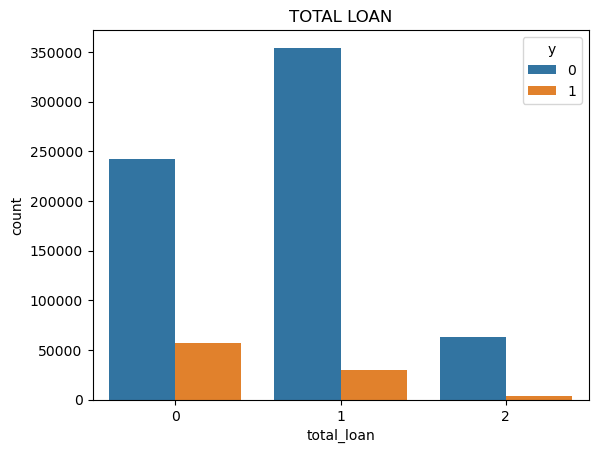

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat,total_loan
0,0,42,technician,married,secondary,0,7,0,0,cellular,25,aug,117,3,-1,0,unknown,0,40-50,0
1,1,38,blue-collar,married,secondary,0,514,0,0,unknown,18,jun,185,1,-1,0,unknown,0,30-40,0
2,2,36,blue-collar,married,secondary,0,602,1,0,unknown,14,may,111,2,-1,0,unknown,0,30-40,1
3,3,27,student,single,secondary,0,34,1,0,unknown,28,may,10,2,-1,0,unknown,0,20-30,1
4,4,26,technician,married,secondary,0,889,1,0,cellular,3,feb,902,1,-1,0,unknown,1,20-30,1


In [11]:
sns.countplot(DF_EVAL, x = 'total_loan', hue = 'y')
plt.title("TOTAL LOAN")
plt.show()
DF_EVAL.head()

In [12]:
# CLEAR na VALUES IN CONTACT COLUMN
DF_EVAL.loc[DF_EVAL['contact']=='unknown','contact'] = np.nan
DF_TEST.loc[DF_TEST['contact']=='unknown','contact'] = np.nan
DF_EVAL.isna().sum()
DF_EVAL['contact'].value_counts()
DF_EVAL['contact'] = DF_EVAL['contact'].fillna(DF_EVAL.groupby(['age', 'job'])['contact'].transform(lambda x:x.mode()[0] if not x.mode().empty else None))
DF_TEST['contact'] = DF_TEST['contact'].fillna(DF_TEST.groupby(['age', 'job'])['contact'].transform(lambda x:x.mode()[0] if not x.mode().empty else None))
DF_EVAL.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat,total_loan
0,0,42,technician,married,secondary,0,7,0,0,cellular,25,aug,117,3,-1,0,unknown,0,40-50,0
1,1,38,blue-collar,married,secondary,0,514,0,0,cellular,18,jun,185,1,-1,0,unknown,0,30-40,0
2,2,36,blue-collar,married,secondary,0,602,1,0,cellular,14,may,111,2,-1,0,unknown,0,30-40,1
3,3,27,student,single,secondary,0,34,1,0,cellular,28,may,10,2,-1,0,unknown,0,20-30,1
4,4,26,technician,married,secondary,0,889,1,0,cellular,3,feb,902,1,-1,0,unknown,1,20-30,1


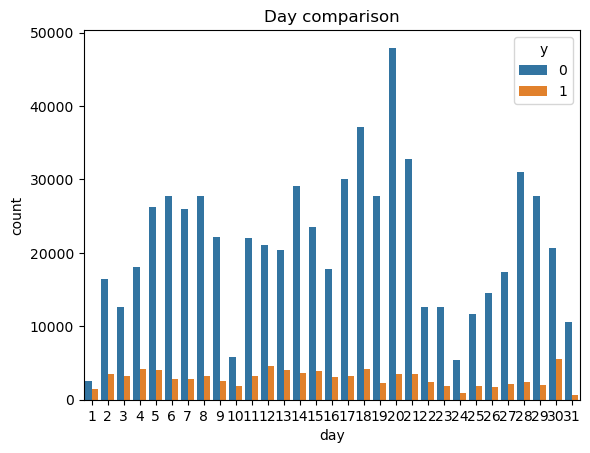

In [13]:
#PREPROCESSING DAY

sns.countplot(DF_EVAL, x= 'day', hue='y')
plt.title("Day comparison")
plt.show()

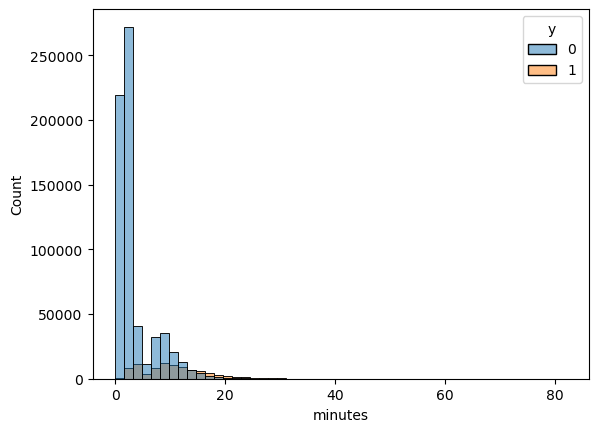

375

In [14]:
#PREPROCESSING DURATION COLUMN AS THERE IS NO PROBLEM WITH MONTH
dur = DF_EVAL['duration'].tolist()
dur.sort()
dur = set(dur)
dur
DF_EVAL['minutes'] = (DF_EVAL['duration']/60).round(1)
DF_TEST['minutes'] = (DF_TEST['duration']/60).round(1)

sns.histplot(DF_EVAL, x= 'minutes', hue='y',  bins =50)
plt.show()

DF_EVAL.head()
len(DF_EVAL['minutes'].unique().tolist())



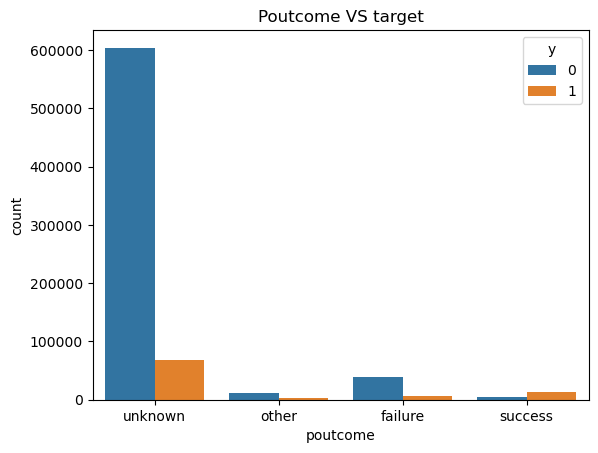

,id,age,job,marital,education,default,balance,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,y,age_cat,total_loan,minutes
0,0,42,technician,married,secondary,0,7,0,0,cellular,...,aug,117,3,-1,0,unknown,0,40-50,0,2.0
1,1,38,blue-collar,married,secondary,0,514,0,0,cellular,...,jun,185,1,-1,0,unknown,0,30-40,0,3.1
2,2,36,blue-collar,married,secondary,0,602,1,0,cellular,...,may,111,2,-1,0,unknown,0,30-40,1,1.8
3,3,27,student,single,secondary,0,34,1,0,cellular,...,may,10,2,-1,0,unknown,0,20-30,1,0.2
4,4,26,technician,married,secondary,0,889,1,0,cellular,...,feb,902,1,-1,0,unknown,1,20-30,1,15.0


In [15]:
#PREPROCESSING DURATION CAMPAIGN
plt.title("Poutcome VS target")
sns.countplot(DF_EVAL, x= 'poutcome', hue='y' )
plt.show()
DF_EVAL.head()



In [16]:
#ADDING NEW FEATURES

# Age group
DF_EVAL['age_group'] = pd.cut(DF_EVAL['age'], bins=[0,30,50,100], labels=['young','middle-aged','senior'])
DF_TEST['age_group'] = pd.cut(DF_TEST['age'], bins=[0,30,50,100], labels=['young','middle-aged','senior'])

# Balance category
DF_EVAL['balance_cat'] = pd.qcut(DF_EVAL['balance'], q=3, labels=['low','medium','high'])
DF_TEST['balance_cat'] = pd.qcut(DF_TEST['balance'], q=3, labels=['low','medium','high'])

# Debt indicator
DF_EVAL['has_debt'] = ((DF_EVAL['housing']=='yes') | (DF_EVAL['loan']=='yes')).astype(int)
DF_TEST['has_debt'] = ((DF_TEST['housing']=='yes') | (DF_TEST['loan']=='yes')).astype(int)

# Contact season
DF_EVAL['contact_season'] = DF_EVAL['month'].map({
    'mar':'spring','apr':'spring','may':'spring',
    'jun':'summer','jul':'summer','aug':'summer',
    'sep':'fall','oct':'fall','nov':'fall',
    'dec':'winter','jan':'winter','feb':'winter'
})
DF_TEST['contact_season'] = DF_TEST['month'].map({
    'mar':'spring','apr':'spring','may':'spring',
    'jun':'summer','jul':'summer','aug':'summer',
    'sep':'fall','oct':'fall','nov':'fall',
    'dec':'winter','jan':'winter','feb':'winter'
})


# First contact
DF_EVAL['is_first_contact'] = (DF_EVAL['pdays'] == -1).astype(int)
DF_TEST['is_first_contact'] = (DF_TEST['pdays'] == -1).astype(int)

# Total contacts
DF_EVAL['total_contacts'] = DF_EVAL['previous'] + DF_EVAL['campaign']
DF_TEST['total_contacts'] = DF_TEST['previous'] + DF_TEST['campaign']

# Contact efficiency
DF_EVAL['contact_efficiency'] = DF_EVAL['duration'] / (DF_EVAL['campaign'].replace(0,1))
DF_TEST['contact_efficiency'] = DF_TEST['duration'] / (DF_TEST['campaign'].replace(0,1))

In [17]:
DF_EVAL.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,...,age_cat,total_loan,minutes,age_group,balance_cat,has_debt,contact_season,is_first_contact,total_contacts,contact_efficiency
0,0,42,technician,married,secondary,0,7,0,0,cellular,...,40-50,0,2.0,middle-aged,low,0,summer,1,3,39.0
1,1,38,blue-collar,married,secondary,0,514,0,0,cellular,...,30-40,0,3.1,middle-aged,medium,0,summer,1,1,185.0
2,2,36,blue-collar,married,secondary,0,602,1,0,cellular,...,30-40,1,1.8,middle-aged,medium,0,spring,1,2,55.5
3,3,27,student,single,secondary,0,34,1,0,cellular,...,20-30,1,0.2,young,low,0,spring,1,2,5.0
4,4,26,technician,married,secondary,0,889,1,0,cellular,...,20-30,1,15.0,young,medium,0,winter,1,1,902.0


# THE DATA HAS BEEN CLEANED, NOW WE NEED TO CONVERT THE COLUMNS WITH STRING DATATYPES TO FLOAT

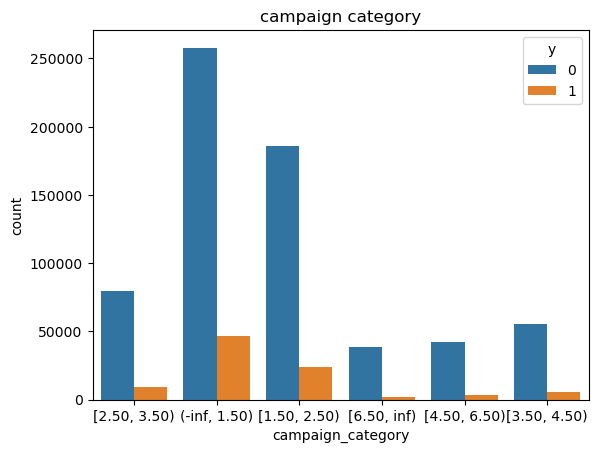

,id,age,job,marital,education,default,balance,housing,loan,contact,...,total_loan,minutes,age_group,balance_cat,has_debt,contact_season,is_first_contact,total_contacts,contact_efficiency,campaign_category
0,0,42,technician,married,secondary,0,7,0,0,cellular,...,0,2.0,middle-aged,low,0,summer,1,3,39.0,"[2.50, 3.50)"
1,1,38,blue-collar,married,secondary,0,514,0,0,cellular,...,0,3.1,middle-aged,medium,0,summer,1,1,185.0,"(-inf, 1.50)"
2,2,36,blue-collar,married,secondary,0,602,1,0,cellular,...,1,1.8,middle-aged,medium,0,spring,1,2,55.5,"[1.50, 2.50)"
3,3,27,student,single,secondary,0,34,1,0,cellular,...,1,0.2,young,low,0,spring,1,2,5.0,"[1.50, 2.50)"
4,4,26,technician,married,secondary,0,889,1,0,cellular,...,1,15.0,young,medium,0,winter,1,1,902.0,"(-inf, 1.50)"


In [18]:
from optbinning import OptimalBinning

# Assume target variable y (0/1) and feature campaign
optb = OptimalBinning(name="campaign", dtype="numerical", solver="cp")
optb.fit(DF_EVAL["campaign"], DF_EVAL["y"])

DF_EVAL["campaign_category"] = optb.transform(DF_EVAL["campaign"], metric="bins")
DF_TEST["campaign_category"] = optb.transform(DF_TEST["campaign"], metric="bins")


sns.countplot(DF_EVAL, x = "campaign_category", hue= 'y')
plt.title("campaign category")
plt.show()

DF_EVAL.head()

In [19]:
#LIST TO STORE THE COLUMNS BASED ON DTTYPE
str = []
num = []
bool_col = []

for i in DF_EVAL.columns:
    if pd.api.types.is_numeric_dtype(DF_EVAL[i]):
        num.append(i)
    elif pd.api.types.is_bool_dtype(DF_EVAL[i]):
        bool_col.append(i)
    else:
        str.append(i)

print(str)
print(num)
print(bool_col)


['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'age_cat', 'age_group', 'balance_cat', 'contact_season', 'campaign_category']
['id', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'total_loan', 'minutes', 'has_debt', 'is_first_contact', 'total_contacts', 'contact_efficiency']
[]


In [20]:
lbl = LabelEncoder()

for i in str:
    DF_EVAL[i] = lbl.fit_transform(DF_EVAL[i])
    DF_TEST[i] = lbl.fit_transform(DF_TEST[i])

DF_EVAL.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,...,total_loan,minutes,age_group,balance_cat,has_debt,contact_season,is_first_contact,total_contacts,contact_efficiency,campaign_category
0,0,42,9,1,1,0,7,0,0,0,...,0,2.0,0,1,0,2,1,3,39.0,2
1,1,38,1,1,1,0,514,0,0,0,...,0,3.1,0,2,0,2,1,1,185.0,0
2,2,36,1,1,1,0,602,1,0,0,...,1,1.8,0,2,0,1,1,2,55.5,1
3,3,27,8,2,1,0,34,1,0,0,...,1,0.2,2,1,0,1,1,2,5.0,1
4,4,26,9,1,1,0,889,1,0,0,...,1,15.0,2,2,0,3,1,1,902.0,0


# MODEL BUILDING FOR PREDICTION

In [21]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

x_eval = DF_EVAL.drop(columns=['id','y'])
y_eval = DF_EVAL['y']

x_train, x_test, y_train, y_test = train_test_split(x_eval, y_eval, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42 )

model.fit(x_train, y_train)
prd_train = model.predict(x_train)
prd_test = model.predict(x_test)

print(f"f1-score - train : {f1_score(prd_train, y_train)}")
print(f"confusion_matrix : {confusion_matrix(prd_train, y_train)}")

print(f"f1-score - test : {f1_score(prd_test, y_test)}")
print(f"confusion_matrix : {confusion_matrix(prd_test, y_test)}")

f1-score - train : 0.6436351969198685
confusion_matrix : [[515451  32162]
 [ 12266  40121]]
f1-score - test : 0.6346912794398473
confusion_matrix : [[128551   8234]
 [  3244   9971]]


In [22]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

prd_train = model_xgb.predict(x_train)
prd_test = model_xgb.predict(x_test)

print(f"f1-score - train : {f1_score(prd_train, y_train)}")
print(f"confusion_matrix : {confusion_matrix(prd_train, y_train)}")

print(f"f1-score - test : {f1_score(prd_test, y_test)}")
print(f"confusion_matrix : {confusion_matrix(prd_test, y_test)}")

f1-score - train : 0.7208274214024345
confusion_matrix : [[514353  24020]
 [ 13364  48263]]
f1-score - test : 0.6965702356099016
confusion_matrix : [[128148   6527]
 [  3647  11678]]


In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score


X = DF_EVAL.drop(columns=['id','y'])
y = DF_EVAL['y']

X_TEST = DF_TEST.drop(columns= ["id"])

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model_lg = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=-1,
    num_leaves=64,
    colsample_bytree=0.8,
    subsample=0.8,
    class_weight= 'balanced'
)
model_lg.fit(  X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc")

prd_train = model_lg.predict(X_train)
prd_test = model_lg.predict(X_val)

print(f"f1-score - train : {f1_score(prd_train, y_train)}")
print(f"confusion_matrix : {confusion_matrix(prd_train, y_train)}")
print(f"roc_auc_score : {roc_auc_score(prd_train, y_train)}")

print(f"f1-score - test : {f1_score(prd_test, y_test)}")
print(f"confusion_matrix : {confusion_matrix(prd_test, y_test)}")
print(f"roc_auc_score : {roc_auc_score(prd_test, y_test)}")

y_prob = model.predict_proba(X_TEST)[:, 1]
submission = pd.DataFrame({
    "id": DF_TEST["id"],
    "y": y_prob
})
submission.to_csv("submission.csv", index=False)


[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
f1-score - train : 0.6589035997235072
confusion_matrix : [[461279   4234]
 [ 66331  68156]]
roc_auc_score : 0.7488448501462625
f1-score - test : 0.1558225472555962
confusion_matrix : [[102340  14178]
 [ 29455   4027]]
roc_auc_score : 0.49929640474043113


In [25]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import lightgbm as lgb

X = DF_EVAL.drop(columns=['id','y'])
y = DF_EVAL['y']

X_TEST = DF_TEST.drop(columns=["id"])

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model_lg = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=-1,
    num_leaves=64,
    colsample_bytree=0.8,
    subsample=0.8,
    class_weight='balanced'
)

model_lg.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
    callbacks=[
        lgb.early_stopping(100),   # stop if no improvement in 100 rounds
        lgb.log_evaluation(100)    # print every 100 rounds
    ]
)

# Predictions
prd_train = model_lg.predict(X_train)
prd_val = model_lg.predict(X_val)

# Metrics
print(f"f1-score - train : {f1_score(y_train, prd_train)}")
print(f"confusion_matrix - train : \n{confusion_matrix(y_train, prd_train)}")
print(f"roc_auc_score - train : {roc_auc_score(y_train, model_lg.predict_proba(X_train)[:,1])}")

print(f"f1-score - val : {f1_score(y_val, prd_val)}")
print(f"confusion_matrix - val : \n{confusion_matrix(y_val, prd_val)}")
print(f"roc_auc_score - val : {roc_auc_score(y_val, model_lg.predict_proba(X_val)[:,1])}")

# Submission
y_prob = model_lg.predict_proba(X_TEST)[:, 1]
submission = pd.DataFrame({
    "id": DF_TEST["id"],
    "y": y_prob
})
submission.to_csv("submission_lgbm.csv", index=False)


[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.951805	valid_0's binary_logloss: 0.385597
[200]	valid_0's auc: 0.954952	valid_0's binary_logloss: 0.31073
[300]	valid_0's auc: 0.957478	valid_0's binary_logloss: 0.285259
[400]	valid_0's auc: 0.959467	valid_0's binary_logloss: 0.273239
[500]	valid_0's auc: 0.960936	valid_0's binary_logloss: 0.265893
[600]	valid_0's auc: 0.962282	valid_0's binary_logloss: 

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

NFOLDS = 5
skf = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

oof_preds_lgb = np.zeros(len(X))
oof_preds_cat = np.zeros(len(X))
oof_preds_xgb = np.zeros(len(X))
test_preds_lgb = np.zeros(len(X_TEST))
test_preds_cat = np.zeros(len(X_TEST))
test_preds_xgb = np.zeros(len(X_TEST))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}/{NFOLDS}")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # -----------------------------
    # LightGBM
    # -----------------------------
    model_lgb = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.01,
        num_leaves=64,
        colsample_bytree=0.8,
        subsample=0.8,
        class_weight='balanced'
    )
    model_lgb.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='auc',
        callbacks=[lgb.early_stopping(100), lgb.log_evaluation(100)]
    )

    oof_preds_lgb[val_idx] = model_lgb.predict_proba(X_val)[:,1]
    test_preds_lgb += model_lgb.predict_proba(X_TEST)[:,1] / NFOLDS

    # -----------------------------
    # CatBoost
    # -----------------------------
    model_cat = CatBoostClassifier(
        iterations=5000,
        learning_rate=0.01,
        depth=6,
        eval_metric='AUC',
        verbose=100,
        random_seed=42,
        class_weights=[1, y.value_counts()[0]/y.value_counts()[1]]
    )
    model_cat.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100)
    oof_preds_cat[val_idx] = model_cat.predict_proba(X_val)[:,1]
    test_preds_cat += model_cat.predict_proba(X_TEST)[:,1] / NFOLDS

    # -----------------------------
    # XGBoost
    # -----------------------------
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_TEST)

    params = {
        "objective": "binary:logistic",
        "learning_rate": 0.01,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "scale_pos_weight": y.value_counts()[0]/y.value_counts()[1],
        "eval_metric": "auc"
    }

    evals = [(dtrain, "train"), (dval, "val")]

    model_xgb = xgb.train(
        params,
        dtrain,
        num_boost_round=10000,
        evals=evals,
        early_stopping_rounds=100,
        verbose_eval=100
    )

    # Predictions
    oof_preds_xgb[val_idx] = model_xgb.predict(dval)
    test_preds_xgb += model_xgb.predict(dtest) / NFOLDS

# -----------------------------
# 4. Ensemble Predictions
# -----------------------------
oof_preds = (oof_preds_lgb + oof_preds_cat + oof_preds_xgb)/3
test_preds = (test_preds_lgb + test_preds_cat + test_preds_xgb)/3



# Binarize predictions at 0.5 threshold
oof_pred_bin = (oof_preds >= 0.5).astype(int)

print("OOF F1-score:", f1_score(y, oof_pred_bin))
print("OOF ROC-AUC:", roc_auc_score(y, oof_preds))
print("OOF Confusion Matrix:\n", confusion_matrix(y, oof_pred_bin))

# -----------------------------
# 5. Prepare Kaggle Submission
# -----------------------------
submission = pd.DataFrame({
    "id": DF_TEST["id"],
    "y": test_preds
})
submission.to_csv("submission_ensemble.csv", index=False)
print("Submission saved!")


Fold 1/5
[LightGBM] [Info] Number of positive: 72391, number of negative: 527609
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.951135	valid_0's binary_logloss: 0.385929
[200]	valid_0's auc: 0.954373	valid_0's binary_logloss: 0.311363
[300]	valid_0's auc: 0.956984	valid_0's binary_logloss: 0.286054
[400]	valid_0's auc: 0.95931	valid_0's binary_logloss: 0.273859
[500]	valid_0's auc: 0.96106	valid_0's binary_logloss: 0.266196
[600]	valid_0's auc: 0.962426	valid_0's binary_l

In [30]:
print(test_preds_xgb)

sub_xgb = pd.DataFrame({"id" : DF_TEST['id'], "y": test_preds_xgb})
sub_xgb.to_csv("submission_xgb.csv", index  = False)
print("CSV saved")

[2.76214778e-02 3.15222926e-01 4.89143069e-04 ... 9.53119949e-01
 6.12713769e-03 4.60212104e-01]
CSV saved


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# =========================
# Load Data
# =========================

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)
X_test = pd.get_dummies(X_TEST, drop_first=True)

# Align train/test
X, X_test = X.align(X_test, join="left", axis=1)
X_test = X_test.fillna(0)

# =========================
# Base models
# =========================
lgb_params = {
    "n_estimators": 1000,
    "learning_rate": 0.02,
    "num_leaves": 64,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "random_state": 42,
}

xgb_params = {
    "n_estimators": 1000,
    "learning_rate": 0.02,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "use_label_encoder": False,
    "eval_metric": "auc",
    "random_state": 42,
}

cat_params = {
    "iterations": 1000,
    "learning_rate": 0.02,
    "depth": 6,
    "eval_metric": "AUC",
    "verbose": 0,
    "random_seed": 42,
}

# =========================
# Stacking with OOF
# =========================
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

oof_preds = np.zeros((X.shape[0], 3))  # LGB, XGB, CAT
test_preds = np.zeros((X_test.shape[0], 3))

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    lgb = LGBMClassifier(**lgb_params)
    lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc"   # track AUC
    )
    oof_preds[val_idx,0] = lgb.predict_proba(X_val)[:,1]
    test_preds[:,0] += lgb.predict_proba(X_test)[:,1] / n_splits

    # XGBoost
    xgb = XGBClassifier(**xgb_params)
    xgb.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False  # XGB supports this
    )
    oof_preds[val_idx,1] = xgb.predict_proba(X_val)[:,1]
    test_preds[:,1] += xgb.predict_proba(X_test)[:,1] / n_splits

    # CatBoost
    cat = CatBoostClassifier(**cat_params)
    cat.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        verbose=False
    )
    oof_preds[val_idx,2] = cat.predict_proba(X_val)[:,1]
    test_preds[:,2] += cat.predict_proba(X_test)[:,1] / n_splits


# =========================
# Meta Learner (LogReg)
# =========================
meta = LogisticRegression(max_iter=500)
meta.fit(oof_preds, y)

oof_meta = meta.predict_proba(oof_preds)[:,1]
test_meta = meta.predict_proba(test_preds)[:,1]

print("Stacked AUC:", roc_auc_score(y, oof_meta))

# =========================
# Submission
# =========================
submission = pd.DataFrame({
    "id": DF_TEST["id"],
    "y": test_meta
})
submission.to_csv("submission_stacking.csv", index=False)
print("Saved submission_stacking.csv")


===== Fold 1 =====
[LightGBM] [Info] Number of positive: 72391, number of negative: 527609
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1590
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120652 -> initscore=-1.986273
[LightGBM] [Info] Start training from score -1.986273


c:\Users\VINOTH\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:44:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


===== Fold 2 =====
[LightGBM] [Info] Number of positive: 72391, number of negative: 527609
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120652 -> initscore=-1.986273
[LightGBM] [Info] Start training from score -1.986273


c:\Users\VINOTH\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:49:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


===== Fold 3 =====
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289


c:\Users\VINOTH\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


===== Fold 4 =====
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1577
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289


c:\Users\VINOTH\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:57:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


===== Fold 5 =====
[LightGBM] [Info] Number of positive: 72390, number of negative: 527610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1585
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120650 -> initscore=-1.986289
[LightGBM] [Info] Start training from score -1.986289


c:\Users\VINOTH\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:01:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Stacked AUC: 0.9663981108903444
Saved submission_stacking.csv


In [39]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

def objective(trial):
    params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "metric": "auc",
        "verbosity": -1,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 31, 255),
        "max_depth": trial.suggest_int("max_depth", -1, 16),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 200),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "n_estimators": 2000
    }

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    aucs = []

    for train_idx, valid_idx in cv.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[valid_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[valid_idx]

        model = lgb.LGBMClassifier(**params)

        # use callbacks instead of early_stopping_rounds
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric="auc",
            callbacks=[lgb.early_stopping(100), lgb.log_evaluation(0)]
        )

        preds = model.predict_proba(X_val)[:, 1]
        aucs.append(roc_auc_score(y_val, preds))

    return np.mean(aucs)


# 🔥 Run Optuna search
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
print("Best AUC:", study.best_value)


[I 2025-08-19 09:10:38,086] A new study created in memory with name: no-name-a36f8f5c-2709-4fd6-926d-ca42fa5b737b


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.967139
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1868]	valid_0's auc: 0.966728
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1887]	valid_0's auc: 0.96709


[I 2025-08-19 09:41:59,126] Trial 0 finished with value: 0.9669856509246312 and parameters: {'learning_rate': 0.014050712844480315, 'num_leaves': 202, 'max_depth': 12, 'min_child_samples': 76, 'subsample': 0.9489777552938381, 'colsample_bytree': 0.9749814112285864, 'reg_alpha': 8.748854383259018e-06, 'reg_lambda': 4.892459987502193e-07}. Best is trial 0 with value: 0.9669856509246312.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[525]	valid_0's auc: 0.967271
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[452]	valid_0's auc: 0.966662
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[455]	valid_0's auc: 0.967038


[I 2025-08-19 09:51:50,043] Trial 1 finished with value: 0.9669904210879522 and parameters: {'learning_rate': 0.07872367582126606, 'num_leaves': 230, 'max_depth': 10, 'min_child_samples': 18, 'subsample': 0.9571853851270904, 'colsample_bytree': 0.6791084328545212, 'reg_alpha': 0.7777991500222278, 'reg_lambda': 0.006020490256734903}. Best is trial 1 with value: 0.9669904210879522.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1999]	valid_0's auc: 0.960583
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.960147
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.960622


[I 2025-08-19 09:56:07,678] Trial 2 finished with value: 0.960450325499766 and parameters: {'learning_rate': 0.06959591158992665, 'num_leaves': 199, 'max_depth': 2, 'min_child_samples': 42, 'subsample': 0.7794453529763055, 'colsample_bytree': 0.5983708444547149, 'reg_alpha': 1.5266061805693493e-08, 'reg_lambda': 0.009831129232465218}. Best is trial 1 with value: 0.9669904210879522.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1994]	valid_0's auc: 0.967189
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.966697
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.967074


[I 2025-08-19 10:02:21,071] Trial 3 finished with value: 0.9669869361889396 and parameters: {'learning_rate': 0.01404139491957643, 'num_leaves': 85, 'max_depth': 15, 'min_child_samples': 157, 'subsample': 0.5123891622741557, 'colsample_bytree': 0.726944503985804, 'reg_alpha': 0.006803730332208305, 'reg_lambda': 4.901646608880986e-05}. Best is trial 1 with value: 0.9669904210879522.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.94576
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.945471
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.946061


[I 2025-08-19 10:05:35,751] Trial 4 finished with value: 0.9457642368102018 and parameters: {'learning_rate': 0.027438642183416864, 'num_leaves': 32, 'max_depth': 1, 'min_child_samples': 161, 'subsample': 0.5215792761001098, 'colsample_bytree': 0.6334729906587973, 'reg_alpha': 0.013680201038609258, 'reg_lambda': 3.21865010173135e-05}. Best is trial 1 with value: 0.9669904210879522.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[293]	valid_0's auc: 0.967148
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[290]	valid_0's auc: 0.966751
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[310]	valid_0's auc: 0.967024


[I 2025-08-19 10:06:53,034] Trial 5 finished with value: 0.9669746169860463 and parameters: {'learning_rate': 0.10158644397931842, 'num_leaves': 182, 'max_depth': -1, 'min_child_samples': 80, 'subsample': 0.6776953252864483, 'colsample_bytree': 0.7846572216700779, 'reg_alpha': 2.198591449703124e-07, 'reg_lambda': 0.6948979322331051}. Best is trial 1 with value: 0.9669904210879522.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1999]	valid_0's auc: 0.967153
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1949]	valid_0's auc: 0.966456
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1997]	valid_0's auc: 0.966837


[I 2025-08-19 10:12:11,337] Trial 6 finished with value: 0.9668149964522114 and parameters: {'learning_rate': 0.04479690375267241, 'num_leaves': 107, 'max_depth': 6, 'min_child_samples': 67, 'subsample': 0.6981349112235553, 'colsample_bytree': 0.936093575144815, 'reg_alpha': 0.10921776036497893, 'reg_lambda': 0.004136323242088546}. Best is trial 1 with value: 0.9669904210879522.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1353]	valid_0's auc: 0.967928
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1314]	valid_0's auc: 0.967582
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1122]	valid_0's auc: 0.967806


[I 2025-08-19 10:16:44,884] Trial 7 finished with value: 0.96777186597471 and parameters: {'learning_rate': 0.043998956490934465, 'num_leaves': 168, 'max_depth': 15, 'min_child_samples': 28, 'subsample': 0.5490427302447289, 'colsample_bytree': 0.5807804456402618, 'reg_alpha': 0.08768500775514493, 'reg_lambda': 8.644380075232334}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1988]	valid_0's auc: 0.967435
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1953]	valid_0's auc: 0.966877
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1996]	valid_0's auc: 0.96732


[I 2025-08-19 10:23:59,668] Trial 8 finished with value: 0.967210323783727 and parameters: {'learning_rate': 0.021782139735988207, 'num_leaves': 164, 'max_depth': 9, 'min_child_samples': 74, 'subsample': 0.6019198802709262, 'colsample_bytree': 0.7762578515708638, 'reg_alpha': 0.00014828001652073778, 'reg_lambda': 0.07662036005297113}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.959563
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.958966
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.959428


[I 2025-08-19 10:27:44,731] Trial 9 finished with value: 0.959319039045646 and parameters: {'learning_rate': 0.01833713930388528, 'num_leaves': 248, 'max_depth': 3, 'min_child_samples': 193, 'subsample': 0.694103914842527, 'colsample_bytree': 0.6537799197287381, 'reg_alpha': 9.809145702637099e-05, 'reg_lambda': 1.4319462119389343}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[463]	valid_0's auc: 0.967904
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[389]	valid_0's auc: 0.967336
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[382]	valid_0's auc: 0.967583


[I 2025-08-19 10:29:39,297] Trial 10 finished with value: 0.9676074672434725 and parameters: {'learning_rate': 0.13932412377113082, 'num_leaves': 123, 'max_depth': 15, 'min_child_samples': 121, 'subsample': 0.822365693458283, 'colsample_bytree': 0.5079090805209069, 'reg_alpha': 8.96115259157279, 'reg_lambda': 6.902709008072644e-08}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[266]	valid_0's auc: 0.967784
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[268]	valid_0's auc: 0.967242
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[304]	valid_0's auc: 0.967537


[I 2025-08-19 10:31:04,379] Trial 11 finished with value: 0.9675210433573058 and parameters: {'learning_rate': 0.1761975937225302, 'num_leaves': 132, 'max_depth': 16, 'min_child_samples': 122, 'subsample': 0.8445432690407899, 'colsample_bytree': 0.504214103643788, 'reg_alpha': 7.718285838096336, 'reg_lambda': 5.838535760735374e-08}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[229]	valid_0's auc: 0.967397
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[267]	valid_0's auc: 0.966987
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[279]	valid_0's auc: 0.967336


[I 2025-08-19 10:32:26,398] Trial 12 finished with value: 0.9672398978721236 and parameters: {'learning_rate': 0.19784666922671365, 'num_leaves': 136, 'max_depth': 13, 'min_child_samples': 119, 'subsample': 0.8438664933621545, 'colsample_bytree': 0.5460678889086864, 'reg_alpha': 3.538027947276759, 'reg_lambda': 1.0630458575711706e-08}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1713]	valid_0's auc: 0.967862
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1529]	valid_0's auc: 0.967371
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1549]	valid_0's auc: 0.967623


[I 2025-08-19 10:37:11,489] Trial 13 finished with value: 0.967618585297286 and parameters: {'learning_rate': 0.04164670843488633, 'num_leaves': 83, 'max_depth': 13, 'min_child_samples': 105, 'subsample': 0.818427291994061, 'colsample_bytree': 0.5047945304488209, 'reg_alpha': 0.09796204694463624, 'reg_lambda': 2.028473102383534e-06}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1996]	valid_0's auc: 0.967313
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1997]	valid_0's auc: 0.966974
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1996]	valid_0's auc: 0.967164


[I 2025-08-19 10:41:26,592] Trial 14 finished with value: 0.9671503066561326 and parameters: {'learning_rate': 0.040406817764455774, 'num_leaves': 61, 'max_depth': 12, 'min_child_samples': 12, 'subsample': 0.6247101829049955, 'colsample_bytree': 0.5751969501749622, 'reg_alpha': 0.009914150286752778, 'reg_lambda': 3.832183468615133e-06}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1979]	valid_0's auc: 0.96704
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1955]	valid_0's auc: 0.966392
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1993]	valid_0's auc: 0.966922


[I 2025-08-19 10:46:11,361] Trial 15 finished with value: 0.966784614485686 and parameters: {'learning_rate': 0.041936998299868945, 'num_leaves': 89, 'max_depth': 6, 'min_child_samples': 43, 'subsample': 0.7618076026485883, 'colsample_bytree': 0.8838975300293432, 'reg_alpha': 0.16127888494701462, 'reg_lambda': 0.00030599026072296927}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[720]	valid_0's auc: 0.967539
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[625]	valid_0's auc: 0.967075
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[689]	valid_0's auc: 0.967359


[I 2025-08-19 10:48:42,468] Trial 16 finished with value: 0.9673242594493939 and parameters: {'learning_rate': 0.056794871263377567, 'num_leaves': 160, 'max_depth': 13, 'min_child_samples': 97, 'subsample': 0.9040397495445684, 'colsample_bytree': 0.5664444025156334, 'reg_alpha': 0.0016046339190263108, 'reg_lambda': 1.7711070572009386e-06}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1999]	valid_0's auc: 0.967291
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1999]	valid_0's auc: 0.966915
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.96718


[I 2025-08-19 10:53:46,251] Trial 17 finished with value: 0.9671286577660737 and parameters: {'learning_rate': 0.028425726258841058, 'num_leaves': 50, 'max_depth': 10, 'min_child_samples': 147, 'subsample': 0.5838822947884257, 'colsample_bytree': 0.7065921942513042, 'reg_alpha': 0.14497859319827408, 'reg_lambda': 7.028858992292512}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.966694
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.966374
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.96658


[I 2025-08-19 10:59:37,152] Trial 18 finished with value: 0.9665492478670344 and parameters: {'learning_rate': 0.010113950643791385, 'num_leaves': 94, 'max_depth': 16, 'min_child_samples': 44, 'subsample': 0.8872706574624895, 'colsample_bytree': 0.8217724371781057, 'reg_alpha': 1.0198589333060166e-05, 'reg_lambda': 1.9656820510636078e-05}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.967603
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1974]	valid_0's auc: 0.96711
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1955]	valid_0's auc: 0.967376


[I 2025-08-19 11:05:35,176] Trial 19 finished with value: 0.9673627972538806 and parameters: {'learning_rate': 0.0318183312878761, 'num_leaves': 156, 'max_depth': 8, 'min_child_samples': 198, 'subsample': 0.643446967288005, 'colsample_bytree': 0.6221965952111602, 'reg_alpha': 0.0008357759817853175, 'reg_lambda': 0.00028272100877886234}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1114]	valid_0's auc: 0.967634
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[877]	valid_0's auc: 0.967009
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[957]	valid_0's auc: 0.967457


[I 2025-08-19 11:08:26,154] Trial 20 finished with value: 0.9673668910125621 and parameters: {'learning_rate': 0.09057069132023401, 'num_leaves': 64, 'max_depth': 13, 'min_child_samples': 101, 'subsample': 0.7249257097483768, 'colsample_bytree': 0.5431738264767635, 'reg_alpha': 0.03840760403427334, 'reg_lambda': 0.34527948496274785}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1063]	valid_0's auc: 0.96798
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[911]	valid_0's auc: 0.96748
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1016]	valid_0's auc: 0.967801


[I 2025-08-19 11:12:07,515] Trial 21 finished with value: 0.9677534825593126 and parameters: {'learning_rate': 0.05657292305383421, 'num_leaves': 113, 'max_depth': 15, 'min_child_samples': 134, 'subsample': 0.8073301325531762, 'colsample_bytree': 0.5055803878018228, 'reg_alpha': 1.055500181924014, 'reg_lambda': 1.4579228847922398e-07}. Best is trial 7 with value: 0.96777186597471.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[887]	valid_0's auc: 0.968053
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[798]	valid_0's auc: 0.967519
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[912]	valid_0's auc: 0.967808


[I 2025-08-19 11:15:10,773] Trial 22 finished with value: 0.9677932052576749 and parameters: {'learning_rate': 0.05486932077980759, 'num_leaves': 113, 'max_depth': 14, 'min_child_samples': 137, 'subsample': 0.8216360984000521, 'colsample_bytree': 0.5008371880352372, 'reg_alpha': 1.02190322283097, 'reg_lambda': 2.448539137607014e-07}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[833]	valid_0's auc: 0.9679
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[844]	valid_0's auc: 0.967393
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[934]	valid_0's auc: 0.967737


[I 2025-08-19 11:17:59,091] Trial 23 finished with value: 0.9676767670252233 and parameters: {'learning_rate': 0.06118735445198419, 'num_leaves': 114, 'max_depth': 15, 'min_child_samples': 145, 'subsample': 0.7714521551761326, 'colsample_bytree': 0.590878365604373, 'reg_alpha': 1.3651485427234367, 'reg_lambda': 1.1007200530532389e-07}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[965]	valid_0's auc: 0.967897
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[996]	valid_0's auc: 0.967329
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1040]	valid_0's auc: 0.967643


[I 2025-08-19 11:21:54,000] Trial 24 finished with value: 0.9676230605602351 and parameters: {'learning_rate': 0.052283532634328424, 'num_leaves': 150, 'max_depth': 11, 'min_child_samples': 176, 'subsample': 0.5671335878682134, 'colsample_bytree': 0.5448041041141543, 'reg_alpha': 0.7332569570182496, 'reg_lambda': 3.457494203584609e-07}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[266]	valid_0's auc: 0.967436
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[220]	valid_0's auc: 0.96693
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[231]	valid_0's auc: 0.967315


[I 2025-08-19 11:23:16,766] Trial 25 finished with value: 0.9672271645897239 and parameters: {'learning_rate': 0.12419061926463366, 'num_leaves': 185, 'max_depth': 14, 'min_child_samples': 133, 'subsample': 0.8814136594632112, 'colsample_bytree': 0.5000955968421628, 'reg_alpha': 0.8356103988347707, 'reg_lambda': 1.1927219126560161e-08}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1405]	valid_0's auc: 0.967741
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1588]	valid_0's auc: 0.967359
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1406]	valid_0's auc: 0.967637


[I 2025-08-19 11:28:22,320] Trial 26 finished with value: 0.9675790793574132 and parameters: {'learning_rate': 0.03223322511547606, 'num_leaves': 112, 'max_depth': 16, 'min_child_samples': 173, 'subsample': 0.9891742800485853, 'colsample_bytree': 0.6726683076468933, 'reg_alpha': 0.37422173540576537, 'reg_lambda': 1.2482472680490665e-05}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[438]	valid_0's auc: 0.967425
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[455]	valid_0's auc: 0.966926
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[477]	valid_0's auc: 0.9673


[I 2025-08-19 11:30:10,238] Trial 27 finished with value: 0.9672169415537022 and parameters: {'learning_rate': 0.07307461852964225, 'num_leaves': 175, 'max_depth': 14, 'min_child_samples': 134, 'subsample': 0.7907666671551411, 'colsample_bytree': 0.6121478637366304, 'reg_alpha': 0.03095553067696111, 'reg_lambda': 0.06211577628239002}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[984]	valid_0's auc: 0.967641
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[683]	valid_0's auc: 0.967018
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[907]	valid_0's auc: 0.967353


[I 2025-08-19 11:33:16,352] Trial 28 finished with value: 0.9673372427308854 and parameters: {'learning_rate': 0.051499663309805536, 'num_leaves': 144, 'max_depth': 11, 'min_child_samples': 86, 'subsample': 0.7325439482174861, 'colsample_bytree': 0.5490138250441865, 'reg_alpha': 0.0020893691122652516, 'reg_lambda': 3.9924920199154295e-07}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1997]	valid_0's auc: 0.967351
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.966795
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.967163


[I 2025-08-19 11:38:42,473] Trial 29 finished with value: 0.9671029457305854 and parameters: {'learning_rate': 0.03670828433069845, 'num_leaves': 212, 'max_depth': 6, 'min_child_samples': 53, 'subsample': 0.9187792829881907, 'colsample_bytree': 0.5329636780864747, 'reg_alpha': 1.657748906368833, 'reg_lambda': 0.001160770331588917}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1980]	valid_0's auc: 0.967156
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1545]	valid_0's auc: 0.966587
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1579]	valid_0's auc: 0.967022


[I 2025-08-19 11:43:25,859] Trial 30 finished with value: 0.9669219554777152 and parameters: {'learning_rate': 0.022357122803765585, 'num_leaves': 126, 'max_depth': 12, 'min_child_samples': 28, 'subsample': 0.6637666621299813, 'colsample_bytree': 0.9784599823482094, 'reg_alpha': 4.368707198517691e-06, 'reg_lambda': 2.640560432217208e-07}. Best is trial 22 with value: 0.9677932052576749.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[874]	valid_0's auc: 0.96819
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[804]	valid_0's auc: 0.967537
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[827]	valid_0's auc: 0.967896


[I 2025-08-19 11:46:19,048] Trial 31 finished with value: 0.9678744929399019 and parameters: {'learning_rate': 0.06338157559408501, 'num_leaves': 110, 'max_depth': 15, 'min_child_samples': 145, 'subsample': 0.799717203900587, 'colsample_bytree': 0.5890031032056571, 'reg_alpha': 3.5948788362433213, 'reg_lambda': 6.01898107681327e-08}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[612]	valid_0's auc: 0.968054
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[611]	valid_0's auc: 0.967492
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[675]	valid_0's auc: 0.967757


[I 2025-08-19 11:48:34,185] Trial 32 finished with value: 0.967767517773385 and parameters: {'learning_rate': 0.09156073573955976, 'num_leaves': 103, 'max_depth': 14, 'min_child_samples': 138, 'subsample': 0.8067205259324851, 'colsample_bytree': 0.579346805542083, 'reg_alpha': 3.7487494740288616, 'reg_lambda': 3.050132956512565e-08}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[760]	valid_0's auc: 0.967915
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[619]	valid_0's auc: 0.967335
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[727]	valid_0's auc: 0.967806


[I 2025-08-19 11:50:55,549] Trial 33 finished with value: 0.967684929000443 and parameters: {'learning_rate': 0.08882703864834994, 'num_leaves': 100, 'max_depth': 14, 'min_child_samples': 167, 'subsample': 0.8530886773856865, 'colsample_bytree': 0.6513165019496647, 'reg_alpha': 3.5511325273971868, 'reg_lambda': 3.564325578304324e-08}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1330]	valid_0's auc: 0.967663
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[996]	valid_0's auc: 0.967138
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1386]	valid_0's auc: 0.967565


[I 2025-08-19 11:54:21,038] Trial 34 finished with value: 0.9674551399391609 and parameters: {'learning_rate': 0.07114199722191938, 'num_leaves': 66, 'max_depth': 11, 'min_child_samples': 149, 'subsample': 0.7283520127607247, 'colsample_bytree': 0.5986872728813291, 'reg_alpha': 0.32909467054881936, 'reg_lambda': 1.3757250467517462e-06}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[633]	valid_0's auc: 0.967773
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[564]	valid_0's auc: 0.967296
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[680]	valid_0's auc: 0.967645


[I 2025-08-19 11:56:19,928] Trial 35 finished with value: 0.9675709616610733 and parameters: {'learning_rate': 0.11216076317424184, 'num_leaves': 83, 'max_depth': 16, 'min_child_samples': 184, 'subsample': 0.792971840771425, 'colsample_bytree': 0.71034289357061, 'reg_alpha': 3.2234371305532066, 'reg_lambda': 9.930659619515126e-05}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[569]	valid_0's auc: 0.967555
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[479]	valid_0's auc: 0.967064
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[527]	valid_0's auc: 0.967556


[I 2025-08-19 11:58:29,234] Trial 36 finished with value: 0.9673916751665784 and parameters: {'learning_rate': 0.0654127551116715, 'num_leaves': 199, 'max_depth': 14, 'min_child_samples': 112, 'subsample': 0.9381227675857081, 'colsample_bytree': 0.5800418558599378, 'reg_alpha': 0.34705372590936273, 'reg_lambda': 2.3268885903616605e-08}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[556]	valid_0's auc: 0.96738
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[567]	valid_0's auc: 0.96698
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[449]	valid_0's auc: 0.967281


[I 2025-08-19 12:00:27,793] Trial 37 finished with value: 0.9672137787282287 and parameters: {'learning_rate': 0.08084924165754719, 'num_leaves': 139, 'max_depth': 12, 'min_child_samples': 157, 'subsample': 0.7496572251430332, 'colsample_bytree': 0.6254231433187535, 'reg_alpha': 0.039107187787481616, 'reg_lambda': 4.604326109924061e-06}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1999]	valid_0's auc: 0.966754
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.966244
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.966772


[I 2025-08-19 12:04:37,767] Trial 38 finished with value: 0.9665902312484751 and parameters: {'learning_rate': 0.10036350218530049, 'num_leaves': 171, 'max_depth': 4, 'min_child_samples': 141, 'subsample': 0.5536175937696011, 'colsample_bytree': 0.6664093125855176, 'reg_alpha': 8.48237071713423, 'reg_lambda': 0.015288075950872192}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1195]	valid_0's auc: 0.967373
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[947]	valid_0's auc: 0.966793
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1152]	valid_0's auc: 0.967285


[I 2025-08-19 12:08:27,316] Trial 39 finished with value: 0.9671502281740585 and parameters: {'learning_rate': 0.04811813143955824, 'num_leaves': 220, 'max_depth': 9, 'min_child_samples': 90, 'subsample': 0.8549191496977798, 'colsample_bytree': 0.7356204557359157, 'reg_alpha': 0.005762003776664019, 'reg_lambda': 8.652384379424336e-07}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[382]	valid_0's auc: 0.966926
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[334]	valid_0's auc: 0.966377
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[446]	valid_0's auc: 0.966788


[I 2025-08-19 12:09:40,992] Trial 40 finished with value: 0.9666968423794327 and parameters: {'learning_rate': 0.15134588089112322, 'num_leaves': 74, 'max_depth': 15, 'min_child_samples': 156, 'subsample': 0.5010058207019114, 'colsample_bytree': 0.6972028903815175, 'reg_alpha': 7.942780880949433e-08, 'reg_lambda': 0.0019507218496567793}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[713]	valid_0's auc: 0.967961
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[690]	valid_0's auc: 0.967483
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[735]	valid_0's auc: 0.967846


[I 2025-08-19 12:12:31,050] Trial 41 finished with value: 0.9677635877857029 and parameters: {'learning_rate': 0.06648383076983572, 'num_leaves': 119, 'max_depth': 15, 'min_child_samples': 134, 'subsample': 0.8165469011542642, 'colsample_bytree': 0.5239299193102367, 'reg_alpha': 1.6892408516440647, 'reg_lambda': 1.0149769278444447e-07}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[691]	valid_0's auc: 0.967995
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[626]	valid_0's auc: 0.967468
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[802]	valid_0's auc: 0.967824


[I 2025-08-19 12:15:04,738] Trial 42 finished with value: 0.9677622961862661 and parameters: {'learning_rate': 0.0808039580598296, 'num_leaves': 101, 'max_depth': 14, 'min_child_samples': 130, 'subsample': 0.8291162394747026, 'colsample_bytree': 0.5284283170812388, 'reg_alpha': 2.307886034800552, 'reg_lambda': 3.437729487696245e-08}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[736]	valid_0's auc: 0.967669
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[663]	valid_0's auc: 0.967452
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[655]	valid_0's auc: 0.967545


[I 2025-08-19 12:17:32,611] Trial 43 finished with value: 0.9675556569233068 and parameters: {'learning_rate': 0.06717646466018674, 'num_leaves': 125, 'max_depth': 15, 'min_child_samples': 126, 'subsample': 0.7966392041404036, 'colsample_bytree': 0.5726435979491109, 'reg_alpha': 0.4490134214370382, 'reg_lambda': 1.5461132947478567e-07}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[560]	valid_0's auc: 0.967798
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[430]	valid_0's auc: 0.967298
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[553]	valid_0's auc: 0.967715


[I 2025-08-19 12:19:51,466] Trial 44 finished with value: 0.9676037114962193 and parameters: {'learning_rate': 0.09926706216156718, 'num_leaves': 120, 'max_depth': 16, 'min_child_samples': 113, 'subsample': 0.8752249404277136, 'colsample_bytree': 0.6429589943272919, 'reg_alpha': 3.5047725655862734, 'reg_lambda': 6.169212297118073e-08}. Best is trial 31 with value: 0.9678744929399019.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1563]	valid_0's auc: 0.96815
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1500]	valid_0's auc: 0.967649
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1773]	valid_0's auc: 0.967917


[I 2025-08-19 12:26:58,937] Trial 45 finished with value: 0.9679052268499918 and parameters: {'learning_rate': 0.035710094526591345, 'num_leaves': 104, 'max_depth': -1, 'min_child_samples': 164, 'subsample': 0.7563641771018117, 'colsample_bytree': 0.6020501935481413, 'reg_alpha': 7.98027679061127, 'reg_lambda': 1.0753703416171908e-08}. Best is trial 45 with value: 0.9679052268499918.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1651]	valid_0's auc: 0.968251
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1461]	valid_0's auc: 0.967718
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1632]	valid_0's auc: 0.968044


[I 2025-08-19 12:33:56,215] Trial 46 finished with value: 0.9680043250225258 and parameters: {'learning_rate': 0.034625611151189, 'num_leaves': 98, 'max_depth': 0, 'min_child_samples': 167, 'subsample': 0.706218158396201, 'colsample_bytree': 0.5926983751927196, 'reg_alpha': 5.192639426781684, 'reg_lambda': 1.7100804734962507e-08}. Best is trial 46 with value: 0.9680043250225258.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.967139
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1999]	valid_0's auc: 0.96672
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.967032


[I 2025-08-19 12:40:21,048] Trial 47 finished with value: 0.9669639890784469 and parameters: {'learning_rate': 0.024390072035903786, 'num_leaves': 37, 'max_depth': -1, 'min_child_samples': 185, 'subsample': 0.6950722221178638, 'colsample_bytree': 0.612821115285049, 'reg_alpha': 9.153373469125066, 'reg_lambda': 1.1784458796050264e-08}. Best is trial 46 with value: 0.9680043250225258.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1347]	valid_0's auc: 0.967639
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1348]	valid_0's auc: 0.967143
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1712]	valid_0's auc: 0.967567


[I 2025-08-19 12:45:10,402] Trial 48 finished with value: 0.9674495359572169 and parameters: {'learning_rate': 0.03755620378380508, 'num_leaves': 79, 'max_depth': 0, 'min_child_samples': 162, 'subsample': 0.5344549520321191, 'colsample_bytree': 0.7684935803991096, 'reg_alpha': 0.09736922502537985, 'reg_lambda': 6.187446361711637e-07}. Best is trial 46 with value: 0.9680043250225258.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.946554
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.946276
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.946873


[I 2025-08-19 12:49:01,999] Trial 49 finished with value: 0.946567578907246 and parameters: {'learning_rate': 0.03402110667796001, 'num_leaves': 91, 'max_depth': 1, 'min_child_samples': 174, 'subsample': 0.7493870552680911, 'colsample_bytree': 0.5609859622437721, 'reg_alpha': 0.2285271848389943, 'reg_lambda': 8.542563792363996}. Best is trial 46 with value: 0.9680043250225258.


Best params: {'learning_rate': 0.034625611151189, 'num_leaves': 98, 'max_depth': 0, 'min_child_samples': 167, 'subsample': 0.706218158396201, 'colsample_bytree': 0.5926983751927196, 'reg_alpha': 5.192639426781684, 'reg_lambda': 1.7100804734962507e-08}
Best AUC: 0.9680043250225258


In [41]:
import lightgbm as lgb
import pandas as pd



# Best parameters from Optuna
best_params = {
    'learning_rate': 0.034625611151189,
    'num_leaves': 98,
    'max_depth': 0,
    'min_child_samples': 167,
    'subsample': 0.706218158396201,
    'colsample_bytree': 0.5926983751927196,
    'reg_alpha': 5.192639426781684,
    'reg_lambda': 1.7100804734962507e-08,
    'objective': 'binary',   # or 'multiclass' if multiclass problem
    'metric': 'auc',
    'verbose': -1,
    'n_jobs': -1
}

# Create LightGBM dataset
dtrain = lgb.Dataset(X, label=y)

# Train model
model = lgb.train(
    best_params,
    dtrain,
    num_boost_round=2000,
    valid_sets=[dtrain]
    
)

# Predict on test set
y_pred = model.predict(X_TEST)

# Prepare submission
submission = pd.DataFrame({
    "id": DF_TEST["id"],  # Replace 'id' with your submission id column
    "target": y_pred
})

submission.to_csv("submission.csv", index=False)
print("Submission saved as submission_bestparamlgb.csv")


Submission saved as submission_bestparamlgb.csv


In [46]:
import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

# Prepare your data as DMatrix (X_train, y_train must be numpy or pandas)
dtrain = xgb.DMatrix(X, label=y)

def objective(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "tree_method": "hist",   # change to "gpu_hist" if you have GPU
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
    }

    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=2000,
        folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        early_stopping_rounds=100,
        metrics="auc",
        seed=42,
        verbose_eval=False
    )

    return cv_results["test-auc-mean"].max()

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)  # start with 30 trials, can increase

print("Best trial:", study.best_trial.params)


[I 2025-08-19 17:30:23,538] A new study created in memory with name: no-name-5dcbc953-51e9-4183-baee-87ff59ca5731
[I 2025-08-19 17:59:36,882] Trial 0 finished with value: 0.9661845948131061 and parameters: {'learning_rate': 0.1080243745754084, 'max_depth': 5, 'min_child_weight': 9, 'subsample': 0.6650245072846762, 'colsample_bytree': 0.6526237465305179, 'reg_alpha': 0.0012935476419690581, 'reg_lambda': 2.172940399245954e-07}. Best is trial 0 with value: 0.9661845948131061.
[I 2025-08-19 18:02:29,344] Trial 1 finished with value: 0.9636952452157794 and parameters: {'learning_rate': 0.1949102219137065, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8024320091114803, 'colsample_bytree': 0.7821384555467312, 'reg_alpha': 2.5919689800690243e-07, 'reg_lambda': 0.06502555086627367}. Best is trial 0 with value: 0.9661845948131061.
[I 2025-08-19 18:16:10,767] Trial 2 finished with value: 0.9666328598367411 and parameters: {'learning_rate': 0.04500809610009008, 'max_depth': 10, 'min_child

Best trial: {'learning_rate': 0.023941278801968294, 'max_depth': 11, 'min_child_weight': 5, 'subsample': 0.8102795578058177, 'colsample_bytree': 0.6023025526351364, 'reg_alpha': 8.456376948002102e-06, 'reg_lambda': 1.3658152015652648e-06}


In [47]:
import xgboost as xgb
import pandas as pd

# Replace with your test dataframe
# X_train, y_train, X_test already prepared

# Best Optuna params
xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "tree_method": "hist",  # use "gpu_hist" if GPU is available
    "learning_rate": 0.023941278801968294,
    "max_depth": 11,
    "min_child_weight": 5,
    "subsample": 0.8102795578058177,
    "colsample_bytree": 0.6023025526351364,
    "reg_alpha": 8.456376948002102e-06,
    "reg_lambda": 1.3658152015652648e-06,
}

# Train on full train data
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(X_TEST)

model = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=5000,       # large, rely on early stopping
    evals=[(dtrain, "train")],
    early_stopping_rounds=100,
    verbose_eval=100
)

# Predict on test
preds = model.predict(dtest)

# Create submission file
submission = pd.DataFrame({
    "id": DF_TEST['id'],   # replace with your test ID column
    "target": preds
})
submission.to_csv("submission_xgb.csv", index=False)

print("Submission file saved: submission_xgb.csv")


[0]	train-auc:0.95134
[100]	train-auc:0.96738
[200]	train-auc:0.97117
[300]	train-auc:0.97386
[400]	train-auc:0.97596
[500]	train-auc:0.97767
[600]	train-auc:0.97902
[700]	train-auc:0.98025
[800]	train-auc:0.98131
[900]	train-auc:0.98227
[1000]	train-auc:0.98314
[1100]	train-auc:0.98398
[1200]	train-auc:0.98475
[1300]	train-auc:0.98549
[1400]	train-auc:0.98619
[1500]	train-auc:0.98682
[1600]	train-auc:0.98745
[1700]	train-auc:0.98806
[1800]	train-auc:0.98862
[1900]	train-auc:0.98916
[2000]	train-auc:0.98974
[2100]	train-auc:0.99024
[2200]	train-auc:0.99073
[2300]	train-auc:0.99118
[2400]	train-auc:0.99164
[2500]	train-auc:0.99204
[2600]	train-auc:0.99248
[2700]	train-auc:0.99290
[2800]	train-auc:0.99326
[2900]	train-auc:0.99362
[3000]	train-auc:0.99398
[3100]	train-auc:0.99433
[3200]	train-auc:0.99464
[3300]	train-auc:0.99495
[3400]	train-auc:0.99522
[3500]	train-auc:0.99550
[3600]	train-auc:0.99575
[3700]	train-auc:0.99600
[3800]	train-auc:0.99623
[3900]	train-auc:0.99644
[4000]	train